# 1. K nearest neighbours classifier

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rc('font', **{'size':22})

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep = ';').iloc[:]
df.head(3)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0


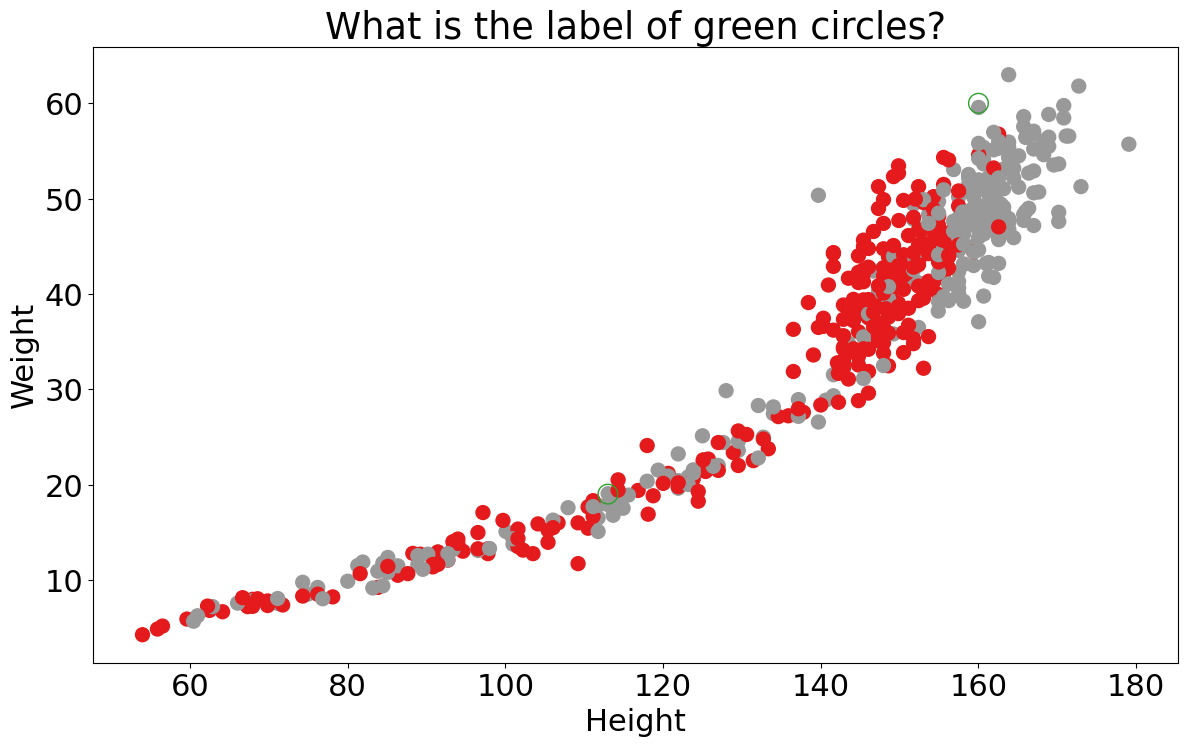

In [5]:
plt.figure(figsize = (14, 8))
plt.scatter(df['height'], df['weight'], c = df['male'], cmap = 'Set1', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')

plt.scatter(113, 19, marker = 'o', s = 200, facecolors = 'none', edgecolors = 'tab:green')
plt.scatter(160, 60, marker = 'o', s = 200, facecolors = 'none', edgecolors = 'tab:green')
plt.title('What is the label of green circles?');

In [6]:
from sklearn.model_selection import KFold

In [7]:
x = list(range(20))
cv = KFold(n_splits = 5, shuffle = True, random_state = 9)

for train, test in cv.split(x):
    print(train, test)

[ 0  1  2  4  8  9 10 11 12 13 14 15 16 17 18 19] [3 5 6 7]
[ 0  1  3  5  6  7  8  9 10 11 12 13 14 17 18 19] [ 2  4 15 16]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 19] [ 9 10 11 18]
[ 1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19] [ 0 12 13 14]
[ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 18] [ 1  8 17 19]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
x = df[['height','weight','age']]
y = df['male']

In [10]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 7)

test_score = []

for train, test in cv.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train], x.iloc[test], y.iloc[train], y.iloc[test]
    print(x_train.shape, x_test.shape)

    clf = KNeighborsClassifier(5)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    test_score.append(accuracy_score(y_test, y_pred))

print(np.mean(test_score), np.std(test_score))

(435, 3) (109, 3)
(435, 3) (109, 3)
(435, 3) (109, 3)
(435, 3) (109, 3)
(436, 3) (108, 3)
0.7187393815834182 0.03924537349503538


In [11]:
test_score

[0.6697247706422018,
 0.7431192660550459,
 0.6880733944954128,
 0.7798165137614679,
 0.7129629629629629]

# cross_val_score

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 7)
clf = KNeighborsClassifier(5)

cross_val_score(clf, x, y, cv=cv)

array([0.66972477, 0.74311927, 0.68807339, 0.77981651, 0.71296296])

# cross_val_predict

In [14]:
from sklearn.model_selection import cross_val_predict

In [15]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 7)

test_score = []

for train, test in cv.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train], x.iloc[test], y.iloc[train], y.iloc[test]
    print(x_train.shape, x_test.shape)

    clf = KNeighborsClassifier(5)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    test_score.append(y_pred)

#print(np.mean(test_score), np.std(test_score))

(435, 3) (109, 3)
(435, 3) (109, 3)
(435, 3) (109, 3)
(435, 3) (109, 3)
(436, 3) (108, 3)


In [16]:
test_score

[array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]),
 array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [17]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 7)
clf = KNeighborsClassifier(5)

cross_val_predict(clf, x, y, cv=cv)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Grid search using sklearn.model_selection.GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 7)
clf = KNeighborsClassifier()

grid = {
    'n_neighbors':range(3,22,2)
}
gs = GridSearchCV(clf, param_grid = grid, cv = cv)
gs.fit(x, y)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(3, 22, 2)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [20]:
gs.cv_results_

{'mean_fit_time': array([0.00150714, 0.00101819, 0.00119977, 0.00111194, 0.00101142,
        0.0010952 , 0.00119781, 0.00104213, 0.00116844, 0.00087361]),
 'std_fit_time': array([5.44799435e-04, 1.60573283e-04, 2.51539913e-04, 3.24313999e-04,
        1.25018974e-04, 1.06592529e-04, 2.18592992e-04, 6.62393580e-05,
        9.40094344e-05, 3.53848515e-05]),
 'mean_score_time': array([0.00227032, 0.00157247, 0.00182743, 0.00178213, 0.00169325,
        0.00176601, 0.00187397, 0.00185695, 0.00192914, 0.00153322]),
 'std_score_time': array([9.37089242e-04, 1.91935314e-04, 1.32508096e-04, 5.12108954e-04,
        1.68914608e-04, 1.36536090e-04, 1.50972473e-04, 2.67599917e-04,
        5.36463207e-05, 7.67037294e-05]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neigh

In [21]:
gs.best_estimator_

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
gs.best_score_

np.float64(0.7444444444444445)

# Random Search

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [27]:
x.shape

(544, 3)

In [ ]:
KNeighborsClassifier()

In [38]:
params = {
    'n_neighbors': stats.randint(2,70),
    'leaf_size': stats.randint(2,50),
}

rs = RandomizedSearchCV(estimator = clf,
                        param_distributions = params,
                        n_iter = 100,
                        cv = cv)
rs.fit(x, y)

,estimator,KNeighborsClassifier()
,param_distributions,"{'leaf_size': <scipy.stats....x77308f3c2030>, 'n_neighbors': <scipy.stats....x77308f3b6a80>}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rs.best_estimator_

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,16
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [40]:
rs.best_score_

np.float64(0.7536867142371729)